[<rdkit.Chem.rdchem.Mol object at 0x7fed26a2bc10>, <rdkit.Chem.rdchem.Mol object at 0x7fed2ace3800>, <rdkit.Chem.rdchem.Mol object at 0x7fed288bec60>, <rdkit.Chem.rdchem.Mol object at 0x7fed288be580>, <rdkit.Chem.rdchem.Mol object at 0x7fed29f61bc0>, <rdkit.Chem.rdchem.Mol object at 0x7fed29f61c10>, <rdkit.Chem.rdchem.Mol object at 0x7fed29f61c60>, <rdkit.Chem.rdchem.Mol object at 0x7fed29f61cb0>, <rdkit.Chem.rdchem.Mol object at 0x7fed29f61d00>, <rdkit.Chem.rdchem.Mol object at 0x7fed29f61d50>, <rdkit.Chem.rdchem.Mol object at 0x7fed29f61da0>, <rdkit.Chem.rdchem.Mol object at 0x7fed29f61df0>, <rdkit.Chem.rdchem.Mol object at 0x7fed29f61e40>, <rdkit.Chem.rdchem.Mol object at 0x7fed29f61e90>]


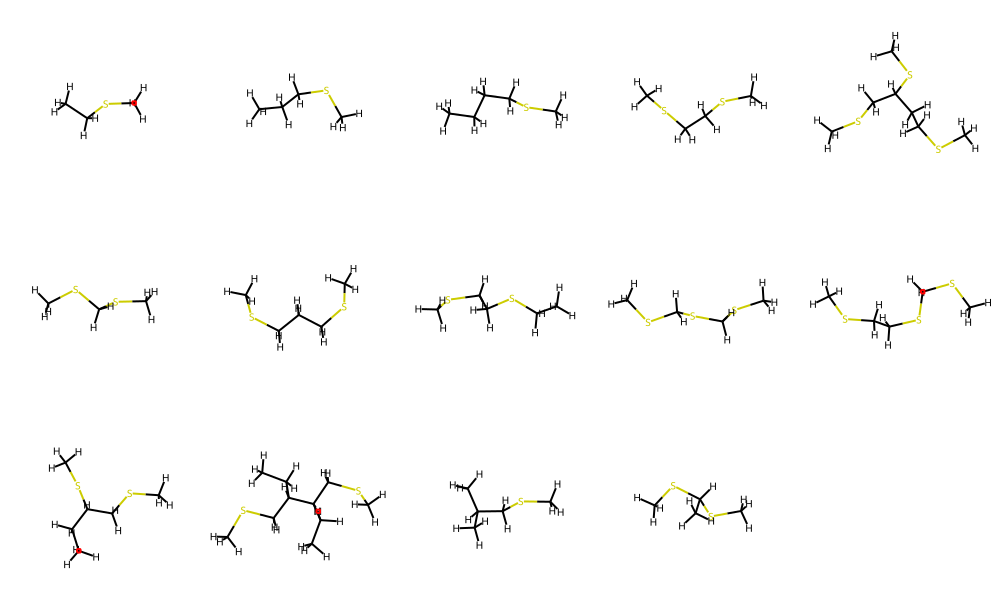

In [25]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import rdmolfiles
from rdkit.Chem.rdmolfiles import SDWriter
from rdkit.Chem import TorsionFingerprints
from rdkit.Chem.Draw import rdDepictor
from rdkit import rdBase


from rdkit import Chem, DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit.Chem import Draw
 
## for molecules tested need to run maestro calculation,
## here is the lines to turn them into .sdf format
database=[]
## get the sdf file from smile file in the setting path
with open("/users/wmm/desktop/result_dia/Test_list.txt", "r+") as f_mae:
    smile_list=[]
    for line in f_mae.readlines():
        smile_list.append(line)
    mol_totalnum=len(smile_list)
    for mol_smi in smile_list:
        mol=Chem.MolFromSmiles(mol_smi)
        mol_real=Chem.AddHs(mol)
        AllChem.EmbedMolecule(mol_real)
        database.append(mol_real)
print(database)

Draw.MolsToGridImage(database,molsPerRow=5)



In [26]:
## cal fingerprint
fps= [FingerprintMols.FingerprintMol(mol) for mol in database]
print(len(database))
print(len(fps))


14
14


In [27]:
size=len(database)
hmap=np.empty(shape=(size,size))
table=pd.DataFrame()
for index, i in enumerate(fps):
    for jndex, j in enumerate(fps):
        similarity=DataStructs.FingerprintSimilarity(i,j)
        hmap[index,jndex]=similarity
        table.loc[database[index],database[jndex]]=similarity
table.head(14)

,<rdkit.Chem.rdchem.Mol object at 0x7fed26a2bc10>,<rdkit.Chem.rdchem.Mol object at 0x7fed2ace3800>,<rdkit.Chem.rdchem.Mol object at 0x7fed288bec60>,<rdkit.Chem.rdchem.Mol object at 0x7fed288be580>,<rdkit.Chem.rdchem.Mol object at 0x7fed29f61bc0>,<rdkit.Chem.rdchem.Mol object at 0x7fed29f61c10>,<rdkit.Chem.rdchem.Mol object at 0x7fed29f61c60>,<rdkit.Chem.rdchem.Mol object at 0x7fed29f61cb0>,<rdkit.Chem.rdchem.Mol object at 0x7fed29f61d00>,<rdkit.Chem.rdchem.Mol object at 0x7fed29f61d50>,<rdkit.Chem.rdchem.Mol object at 0x7fed29f61da0>,<rdkit.Chem.rdchem.Mol object at 0x7fed29f61df0>,<rdkit.Chem.rdchem.Mol object at 0x7fed29f61e40>,<rdkit.Chem.rdchem.Mol object at 0x7fed29f61e90>
<rdkit.Chem.rdchem.Mol object at 0x7fed26a2bc10>,1.000000,0.600000,0.500000,0.642857,0.219512,0.307692,0.473684,0.473684,0.294118,0.360000,0.281250,0.195652,0.428571,0.500000
<rdkit.Chem.rdchem.Mol object at 0x7fed2ace3800>,0.600000,1.000000,0.833333,0.611111,0.365854,0.210526,0.789474,0.478261,0.217391,0.379310,0.468750,0.326087,0.714286,0.434783
<rdkit.Chem.rdchem.Mol object at 0x7fed288bec60>,0.500000,0.833333,1.000000,0.523810,0.439024,0.181818,0.681818,0.423077,0.192308,0.387097,0.562500,0.391304,0.695652,0.384615
<rdkit.Chem.rdchem.Mol object at 0x7fed288be580>,0.642857,0.611111,0.523810,1.000000,0.341463,0.222222,0.500000,0.736842,0.285714,0.560000,0.437500,0.276596,0.458333,0.391304
<rdkit.Chem.rdchem.Mol object at 0x7fed29f61bc0>,0.219512,0.365854,0.439024,0.341463,1.000000,0.139535,0.463415,0.428571,0.255814,0.346939,0.696429,0.474359,0.441860,0.311111
<rdkit.Chem.rdchem.Mol object at 0x7fed29f61c10>,0.307692,0.210526,0.181818,0.222222,0.139535,1.000000,0.173913,0.173913,0.615385,0.320000,0.176471,0.148936,0.208333,0.444444
<rdkit.Chem.rdchem.Mol object at 0x7fed29f61c60>,0.473684,0.789474,0.681818,0.500000,0.463415,0.173913,1.000000,0.407407,0.230769,0.333333,0.457143,0.354167,0.600000,0.423077
<rdkit.Chem.rdchem.Mol object at 0x7fed29f61cb0>,0.473684,0.478261,0.423077,0.736842,0.428571,0.173913,0.407407,1.000000,0.280000,0.466667,0.500000,0.326531,0.428571,0.321429
<rdkit.Chem.rdchem.Mol object at 0x7fed29f61d00>,0.294118,0.217391,0.192308,0.285714,0.255814,0.615385,0.230769,0.280000,1.000000,0.357143,0.323529,0.180000,0.214286,0.476190
<rdkit.Chem.rdchem.Mol object at 0x7fed29f61d50>,0.360000,0.379310,0.387097,0.560000,0.346939,0.320000,0.333333,0.466667,0.357143,1.000000,0.425000,0.365385,0.393939,0.482759


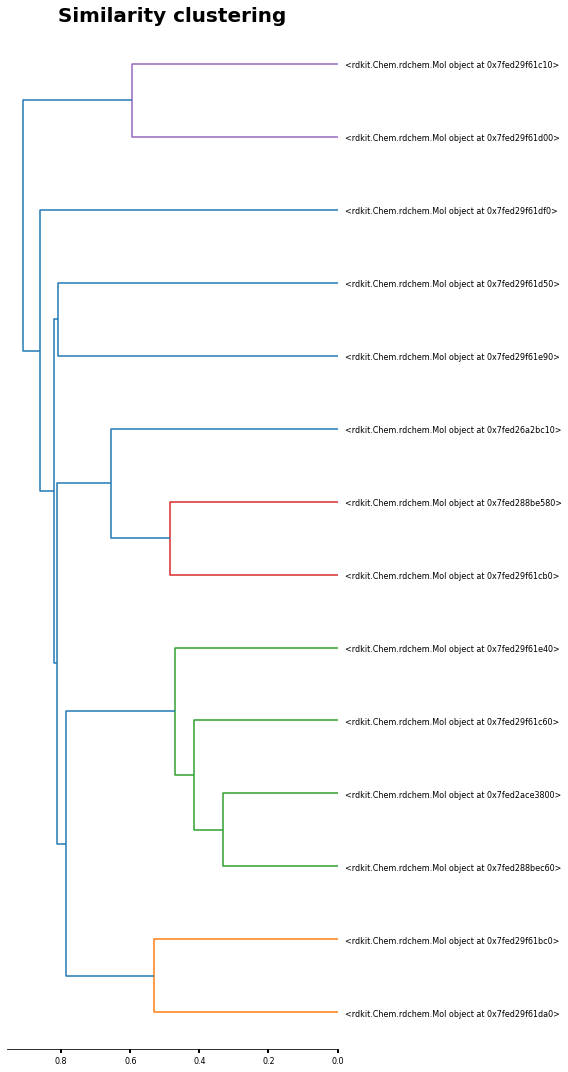

[]

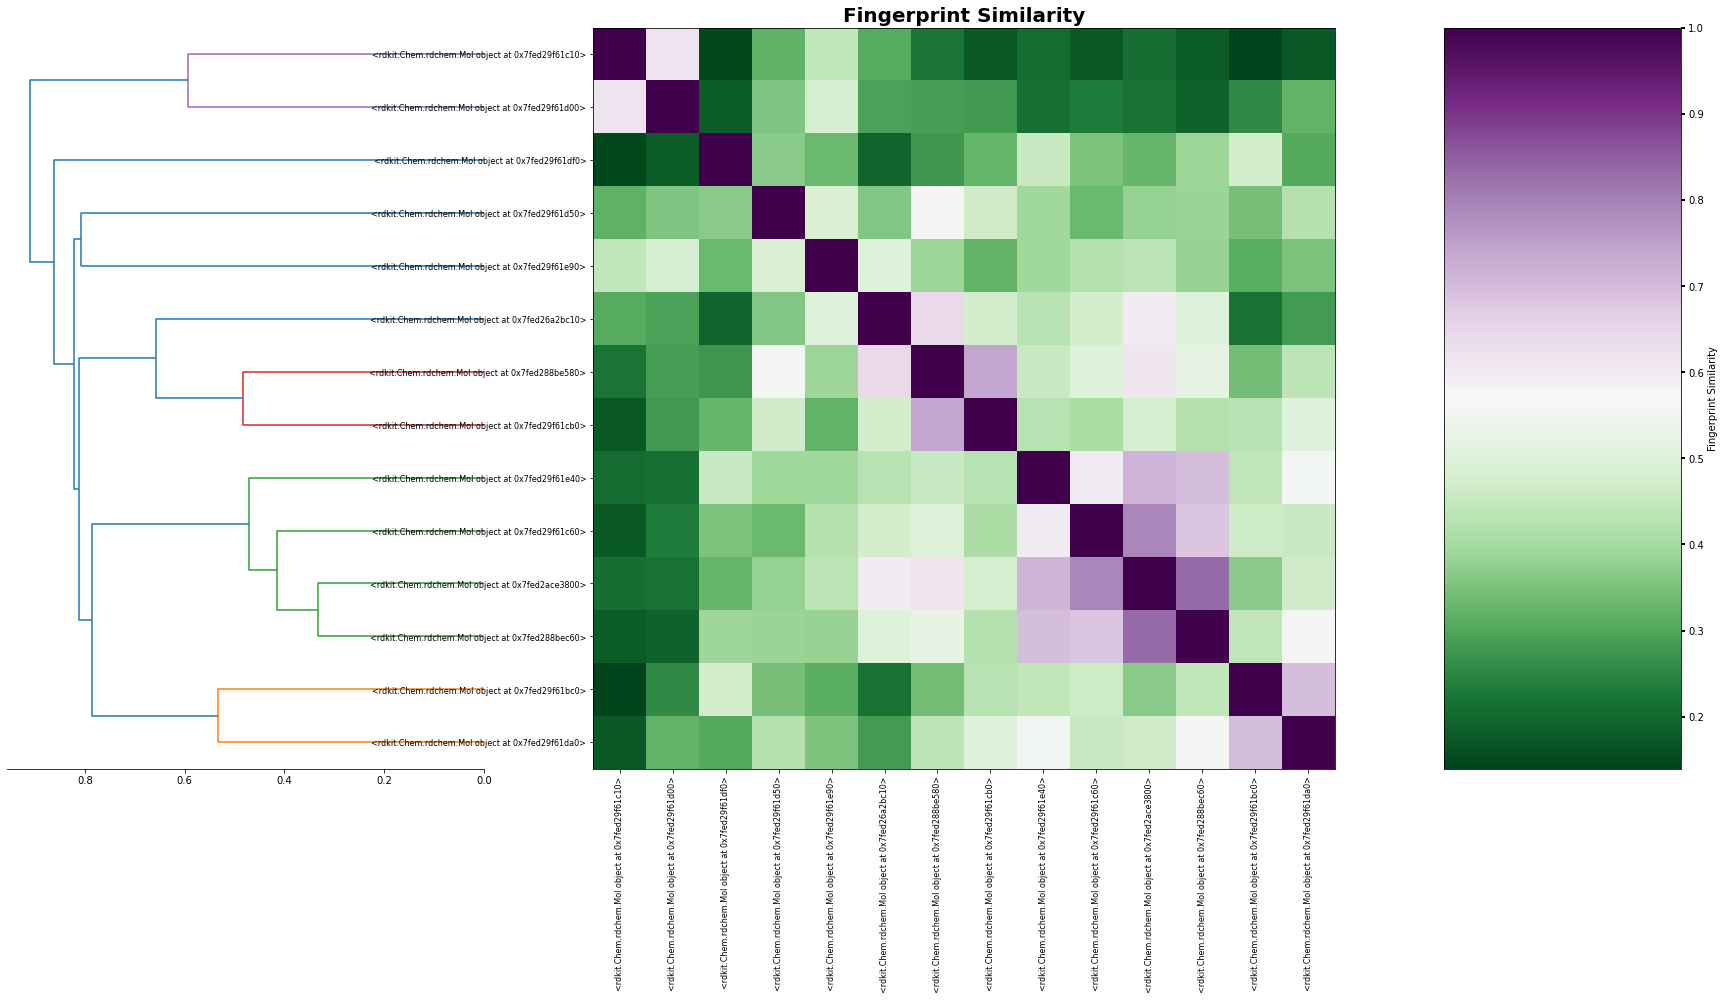

In [29]:
!pip install scipy
!pip install matplotlib
import scipy
import matplotlib.pyplot as plt
from matplotlib import gridspec
#from scipy import scipy.cluster.hierarchy.linkage
from scipy.cluster.hierarchy import dendrogram, linkage
linked=linkage(hmap,'single')
labelList = [mol for mol in database]
plt.figure(figsize=(8,15))
 
ax1=plt.subplot()
o=dendrogram(linked,  
            orientation='left',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
 
ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.title('Similarity clustering',fontsize=20,weight='bold')
plt.tick_params ('both',width=2,labelsize=8)
plt.tight_layout()
plt.show() 

# the clusters in order as the last plot
new_data=list(reversed(o['ivl']))
 
# create a new table with the order of HCL
hmap_2=np.empty(shape=(size,size))
for index,i in enumerate(new_data):
    for jndex,j in enumerate(new_data):
        hmap_2[index,jndex]=table.loc[i].at[j]

figure= plt.figure(figsize=(30,30))
gs1 = gridspec.GridSpec(2,7)
gs1.update(wspace=0.01)
ax1 = plt.subplot(gs1[0:-1, :2])
dendrogram(linked, orientation='left', distance_sort='descending',show_leaf_counts=True,no_labels=True)
ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
 
ax2 = plt.subplot(gs1[0:-1,2:6])
f=ax2.imshow (hmap_2, cmap='PRGn_r', interpolation='nearest')
 
ax2.set_title('Fingerprint Similarity',fontsize=20,weight='bold')
ax2.set_xticks (range(len(new_data)))
ax2.set_yticks (range(len(new_data)))
ax2.set_xticklabels (new_data,rotation=90,size=8)
ax2.set_yticklabels (new_data,size=8)
 
ax3 = plt.subplot(gs1[0:-1,6:7])
m=plt.colorbar(f,cax=ax3,shrink=0.75,orientation='vertical',spacing='uniform',pad=0.01)
m.set_label ('Fingerprint Similarity')
 
plt.tick_params ('both',width=2)
plt.plot()

In [ ]:
# the clusters in order as the last plot
new_data=list(reversed(o['ivl']))
 
# create a new table with the order of HCL
hmap_2=np.empty(shape=(size,size))
for index,i in enumerate(new_data):
    for jndex,j in enumerate(new_data):
        hmap_2[index,jndex]=table.loc[i].at[j]

figure= plt.figure(figsize=(30,30))
gs1 = gridspec.GridSpec(2,7)
gs1.update(wspace=0.01)
ax1 = plt.subplot(gs1[0:-1, :2])
dendrogram(linked, orientation='left', distance_sort='descending',show_leaf_counts=True,no_labels=True)
ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
 
ax2 = plt.subplot(gs1[0:-1,2:6])
f=ax2.imshow (hmap_2, cmap='PRGn_r', interpolation='nearest')
 
ax2.set_title('Fingerprint Similarity',fontsize=20,weight='bold')
ax2.set_xticks (range(len(new_data)))
ax2.set_yticks (range(len(new_data)))
ax2.set_xticklabels (new_data,rotation=90,size=8)
ax2.set_yticklabels (new_data,size=8)
 
ax3 = plt.subplot(gs1[0:-1,6:7])
m=plt.colorbar(f,cax=ax3,shrink=0.75,orientation='vertical',spacing='uniform',pad=0.01)
m.set_label ('Fingerprint Similarity')
 
plt.tick_params ('both',width=2)
plt.plot()